In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [383]:
# 한글 안깨지게, 특수문자 안깨지게, 한글 선명하게
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [384]:
'''
# 리뷰 코멘트가 비어있을 때, 타이틀 컬럼으로 대체하고, RNN 모델(트랜스포머 등) 활용 용이하기 위해 영어 번역 컬럼을 만들 것

# 라틴어 인코딩 해야 안 깨짐, on_bad_lines는 구조가 깨진 행만 무시하고 넘어감
rvw = pd.read_csv("order_reviews.csv", 
                  encoding='latin1', 
                  on_bad_lines='skip')

# 리뷰내용은 비었는데 제목이 있는걸 병합한 버전을 만들어보자
rvw['review_comment_message'] = rvw['review_comment_message'].fillna(rvw['review_comment_title']).copy()

# 무관 컬럼 버리기
view = rvw.drop(['review_comment_title', 'Unnamed: 3', 'Unnamed: 4'], axis= 1)

# 파일 저장
view.to_csv("order_reviews.csv", index=False, encoding='utf-8-sig')
'''

'\n# 리뷰 코멘트가 비어있을 때, 타이틀 컬럼으로 대체하고, RNN 모델(트랜스포머 등) 활용 용이하기 위해 영어 번역 컬럼을 만들 것\n\n# 라틴어 인코딩 해야 안 깨짐, on_bad_lines는 구조가 깨진 행만 무시하고 넘어감\nrvw = pd.read_csv("order_reviews.csv", \n                  encoding=\'latin1\', \n                  on_bad_lines=\'skip\')\n\n# 리뷰내용은 비었는데 제목이 있는걸 병합한 버전을 만들어보자\nrvw[\'review_comment_message\'] = rvw[\'review_comment_message\'].fillna(rvw[\'review_comment_title\']).copy()\n\n# 무관 컬럼 버리기\nview = rvw.drop([\'review_comment_title\', \'Unnamed: 3\', \'Unnamed: 4\'], axis= 1)\n\n# 파일 저장\nview.to_csv("order_reviews.csv", index=False, encoding=\'utf-8-sig\')\n'

In [385]:
# 파일이름 변수에 저장
customers =         "olist_customers_dataset.csv"
geolocation =       "olist_geolocation_dataset.csv"
order_items=        "olist_order_items_dataset.csv"
order_payments=     "olist_order_payments_dataset.csv"
order_reviews=      "olist_order_reviews_dataset.csv"
orders=             "olist_orders_dataset.csv"
products=           "olist_products_dataset.csv"
sellers=            "olist_sellers_dataset.csv"

# 카테고리 번역 테이블 / 새로만든 리뷰내용 테이블
translation=        "product_category_name_translation.csv"
clean_review=       "cleaned_order_reviews.csv"

In [386]:
# 데이터 불러오기
ctm_df = pd.read_csv(customers)
geo_df = pd.read_csv(geolocation)
itm_df = pd.read_csv(order_items)
pay_df = pd.read_csv(order_payments)
rvw_df = pd.read_csv(order_reviews)
rvw_cl = pd.read_csv(clean_review, encoding='latin1', on_bad_lines='skip')
ord_df = pd.read_csv(orders)
pdt_df = pd.read_csv(products)
sel_df = pd.read_csv(sellers)
trans_df = pd.read_csv(translation)

In [387]:
date_cols = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_cols:
    # 그냥 datetime으로 변경했을 떄, 2018년 데이터가 다 날아가는 이슈가 있어서 format 사용
    ord_df[col] = pd.to_datetime(ord_df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 변환 후 2018년 데이터가 살아있는지 확인
print(ord_df['order_purchase_timestamp'].dt.year.value_counts())

order_purchase_timestamp
2018    54011
2017    45101
2016      329
Name: count, dtype: int64


In [388]:
itm_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [389]:
# order_id에 날짜, 리뷰(asc/desc) 가 들어가 있는 경우 발견

'''
0       2017-10-18 1:33
~       order_id가 여러개 겹쳐있고 리뷰도 혼동되어있음
5       O produto mesmo conectado na energia (제품은 전원에 연결되어 있어도 작동하지 않습니다.)
99100   recebi o produto." (제품을 받았습니다.)
'''

rvw_cl

,order_id,review_comment_message,review_score
0,2017-10-18 1:33,NaN,4
1,",,\r\n0606be58306f48924f5b44a39cfab9ec,,,,\r\n...","chegou ate antes do prazo.""",5
2,",,\r\n067cdcc9257641b7d0ed7a49a466dd8d,Pelo va...","que veio perfeita.""",4
3,",,\r\n5400e2987acb955ee428c73ca8f28a76,,Precis...",NaN,5
4,",,\r\nabe1f28ecc30a29b9c57069511cf1464,,Recebi...",NaN,4
...,...,...,...
99192,NaN,NaN,5
99193,NaN,NaN,5
99194,NaN,NaN,5
99195,NaN,NaN,5


In [390]:
# 양옆 공백을 제거한 버전의 길이를 계산
temp_len = rvw_cl['order_id'].astype(str).str.strip().str.len()

# 32자리가 아닌 것들 다시 필터링
wrong_orders = rvw_cl[temp_len != 32]

print(f"공백 제거 후 발견된 이상 데이터: {len(wrong_orders)}건")

공백 제거 후 발견된 이상 데이터: 123건


In [391]:
# 쏙 뽑아서 제거하기
# 이상 데이터의 인덱스번호만 따로 추출
bad_indices = rvw_cl[rvw_cl['order_id'].astype(str).str.strip().str.len() != 32].index

# 해당 인덱스 삭제
rvw_cl = rvw_cl.drop(bad_indices)

# 인덱스 초기화
rvw_cl = rvw_cl.reset_index(drop=True)

# 길이 분포 확인 (32만 남아있어야 정상)
print("현재 데이터의 ID 길이 분포:")
print(rvw_cl['order_id'].astype(str).str.strip().str.len().value_counts())

현재 데이터의 ID 길이 분포:
order_id
32    99074
Name: count, dtype: int64


In [392]:
# 데이터프레임별 행렬길이 확인
print(itm_df.shape, ord_df.shape, rvw_cl.shape, pdt_df.shape)

(112650, 7) (99441, 8) (99074, 3) (32951, 9)


In [393]:
# 컬럼별 결측치유무, 데이터타입 확인
display(itm_df.info(), ord_df.info())
display(rvw_cl.info() ,pdt_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object  

None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99074 entries, 0 to 99073
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   order_id                99074 non-null  object
 1   review_comment_message  42604 non-null  object
 2   review_score            99074 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_lengt

None

None

In [394]:
# 데이터별 결측치 개수 파악
display(itm_df.isna().sum(), ord_df.isna().sum(), rvw_cl.isna().sum(), pdt_df.isna().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_id                      0
review_comment_message    56470
review_score                  0
dtype: int64

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [395]:
# 주문상태 범주 확인, 범주별 갯수 확인
ord_df.groupby('order_status')['order_id'].count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [396]:
# 배송완료된 데이터만 보기
ord_df_c1 = ord_df[ord_df['order_status'] == 'delivered']
ord_df_c1.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [397]:
# 배송은 완료되었으나, 절차상 오류가 있는 데이터 제거
ord_df_c1.dropna(inplace=True)
ord_df_c1.isna().sum()

C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\1814885583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_df_c1.dropna(inplace=True)


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [398]:
# 2016년 4분기 데이터가 존재하나, 불연속적이고 자투리 데이터이기 떄문에 2017년 데이터부터 2018년 8월 데이터까지 적용

ord_df_c1[(ord_df_c1['order_purchase_timestamp'] >= '2017-01-01')&(ord_df_c1['order_purchase_timestamp'] <= '2018-09-01')].reset_index(drop=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
96183,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
96184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
96185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
96186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [399]:
ord_df_c1.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [400]:
# 결측치 있는 행 보기
display(pdt_df[pdt_df['product_weight_g'].isna()], pdt_df[pdt_df['product_category_name'].isna()])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [401]:
# 제품설명과 이름이 없는 상품은 기형적임. 결측치 제거
pdt_df_c1 = pdt_df.dropna().copy()
pdt_df_c1.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

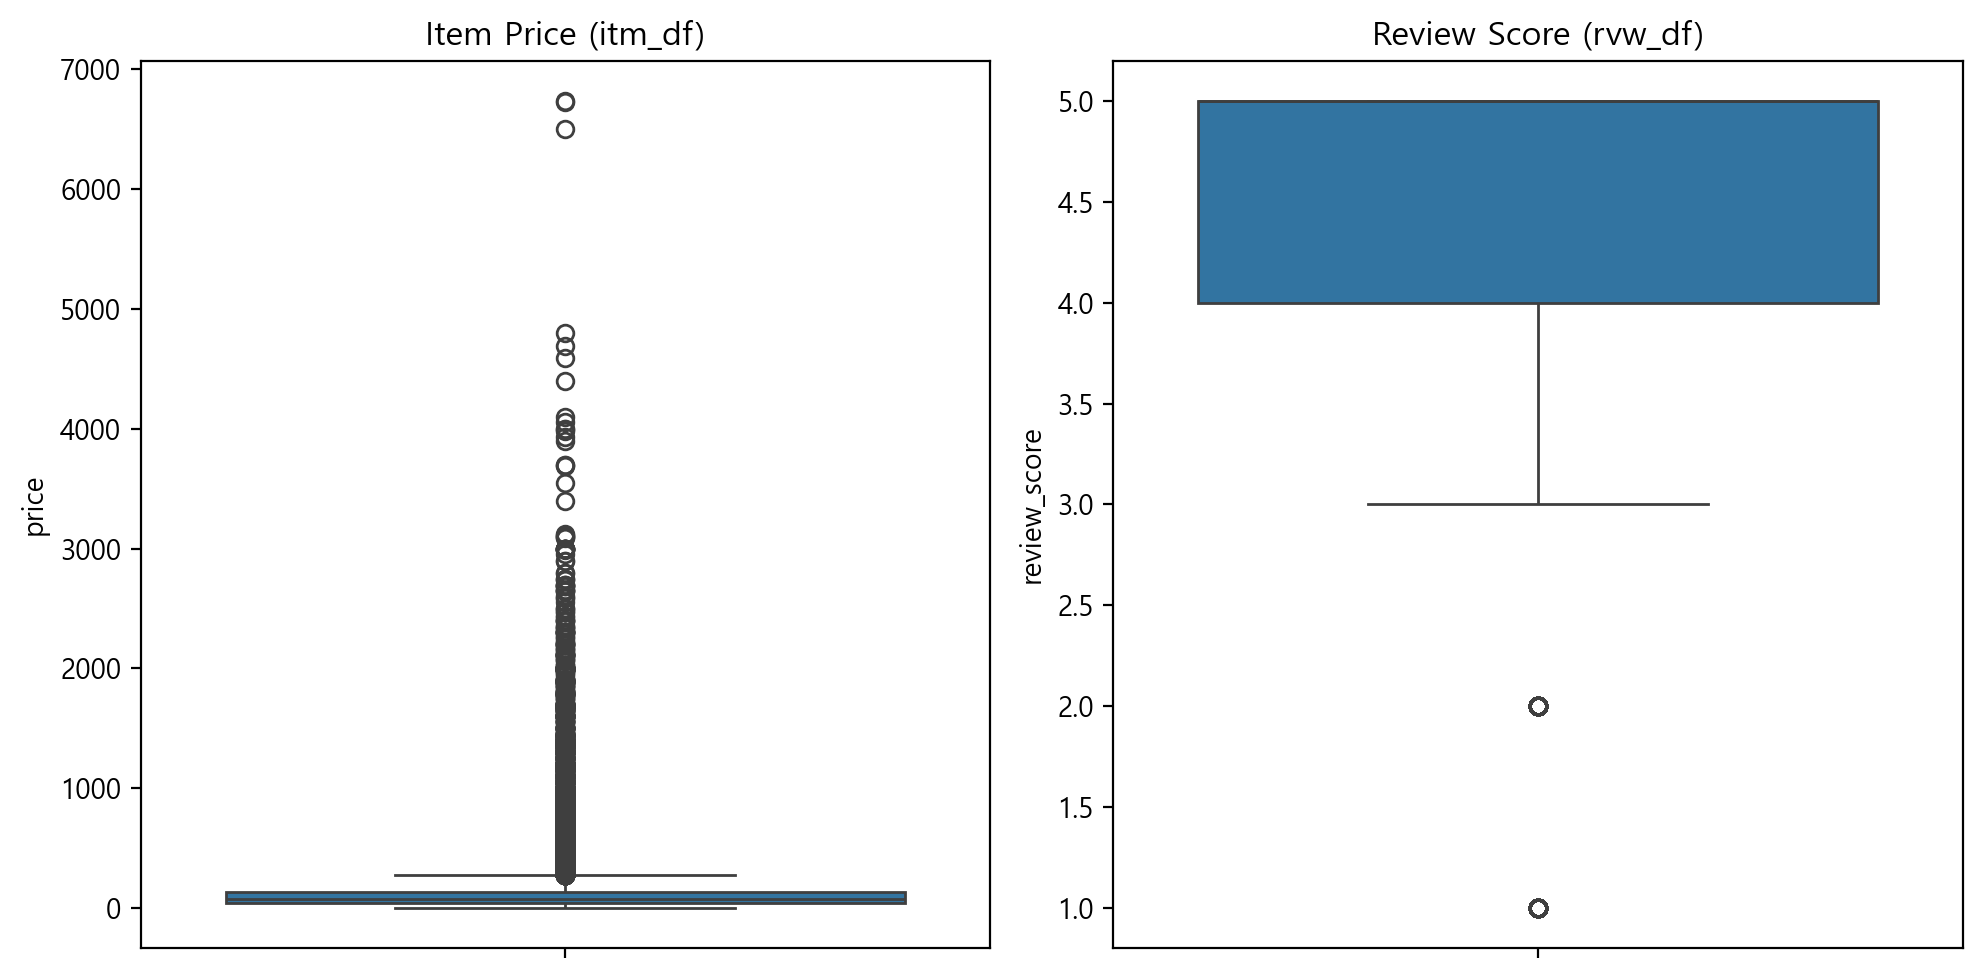

In [402]:
# boxplot 을 이용하여 이상치 체크

# 1행 2열이므로 인덱스는 [0]과 [1]만 존재
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1. 가격
sns.boxplot(data=itm_df['price'], ax=axes[0])
axes[0].set_title('Item Price (itm_df)')

# 2. 리뷰
sns.boxplot(data=rvw_df['review_score'], ax=axes[1])
axes[1].set_title('Review Score (rvw_df)')

plt.tight_layout()
plt.show()

# 크게 이상치랄게 없는 듯?

In [403]:
'''
# 한번에 많은 컬럼을 merge하고자 할 때, 걍 참고용
from functools import reduce

dfs = [itm_df, ord_df, rvw_df]
geo = reduce(lambda left, right: pd.merge(left, right, on='order_id', how='left'), dfs)
'''

"\n# 한번에 많은 컬럼을 merge하고자 할 때, 걍 참고용\nfrom functools import reduce\n\ndfs = [itm_df, ord_df, rvw_df]\ngeo = reduce(lambda left, right: pd.merge(left, right, on='order_id', how='left'), dfs)\n"

In [404]:
# 기본적인 join
df = itm_df.merge(ord_df_c1, on = 'order_id', how = 'left') \
                   .merge(rvw_cl, on = 'order_id', how = 'left') \
                   .merge(pdt_df_c1, on = 'product_id', how = 'left')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_score,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",4.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,NaN,4.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,Chegou antes do prazo previsto e o produto sur...,5.0,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,NaN,1.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,Gostei pois veio no prazo determinado .,4.0,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,NaN,5.0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,NaN,5.0,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,NaN,5.0,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,Recebi o produto antes do prazo e corretamente.,4.0,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [433]:
sdf = df[['order_id', 'shipping_limit_date', 'price', 'freight_value', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'review_comment_message', 'product_category_name' ,'product_name_lenght', 'product_description_lenght', 'product_photos_qty']].copy()

In [406]:
'''
# order_status가 배송완료가 아닌것들의 리뷰는 어떨까?
sdf[sdf['order_status'].isna()]
'''

"\n# order_status가 배송완료가 아닌것들의 리뷰는 어떨까?\nsdf[sdf['order_status'].isna()]\n"

In [407]:
# 연도별 데이터 개수 확인
print("--- 연도별 데이터 건수 ---")
print(sdf['order_purchase_timestamp'].dt.year.value_counts().sort_index())

# 날짜의 최솟값과 최댓값 확인
print("\n데이터 시작일:", sdf['order_purchase_timestamp'].min())
print("데이터 종료일:", sdf['order_purchase_timestamp'].max())

--- 연도별 데이터 건수 ---
order_purchase_timestamp
2016.0      321
2017.0    49930
2018.0    60565
Name: count, dtype: int64

데이터 시작일: 2016-09-15 12:16:38
데이터 종료일: 2018-08-29 15:00:37


In [408]:
# 플랫폼상에서 일어난 총 거래액, 거래횟수 변화 보기

# 총 거래액 계산
sdf['total_order_value'] = sdf['price'] + sdf['freight_value']

# 월별 총 거래액 계산 / numeric_only=True를 넣으면 숫자가 아닌 컬럼 때문에 생기는 에러 방지
monthly_sales = sdf.set_index('order_purchase_timestamp')['total_order_value'].resample('MS').sum().reset_index().copy()

# 결과 확인
monthly_sales.columns = ['month', 'total_amount']
print(monthly_sales.head())

       month  total_amount
0 2016-09-01        143.46
1 2016-10-01      46671.48
2 2016-11-01          0.00
3 2016-12-01         19.62
4 2017-01-01     128339.17


C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\92446864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['total_order_value'] = sdf['price'] + sdf['freight_value']


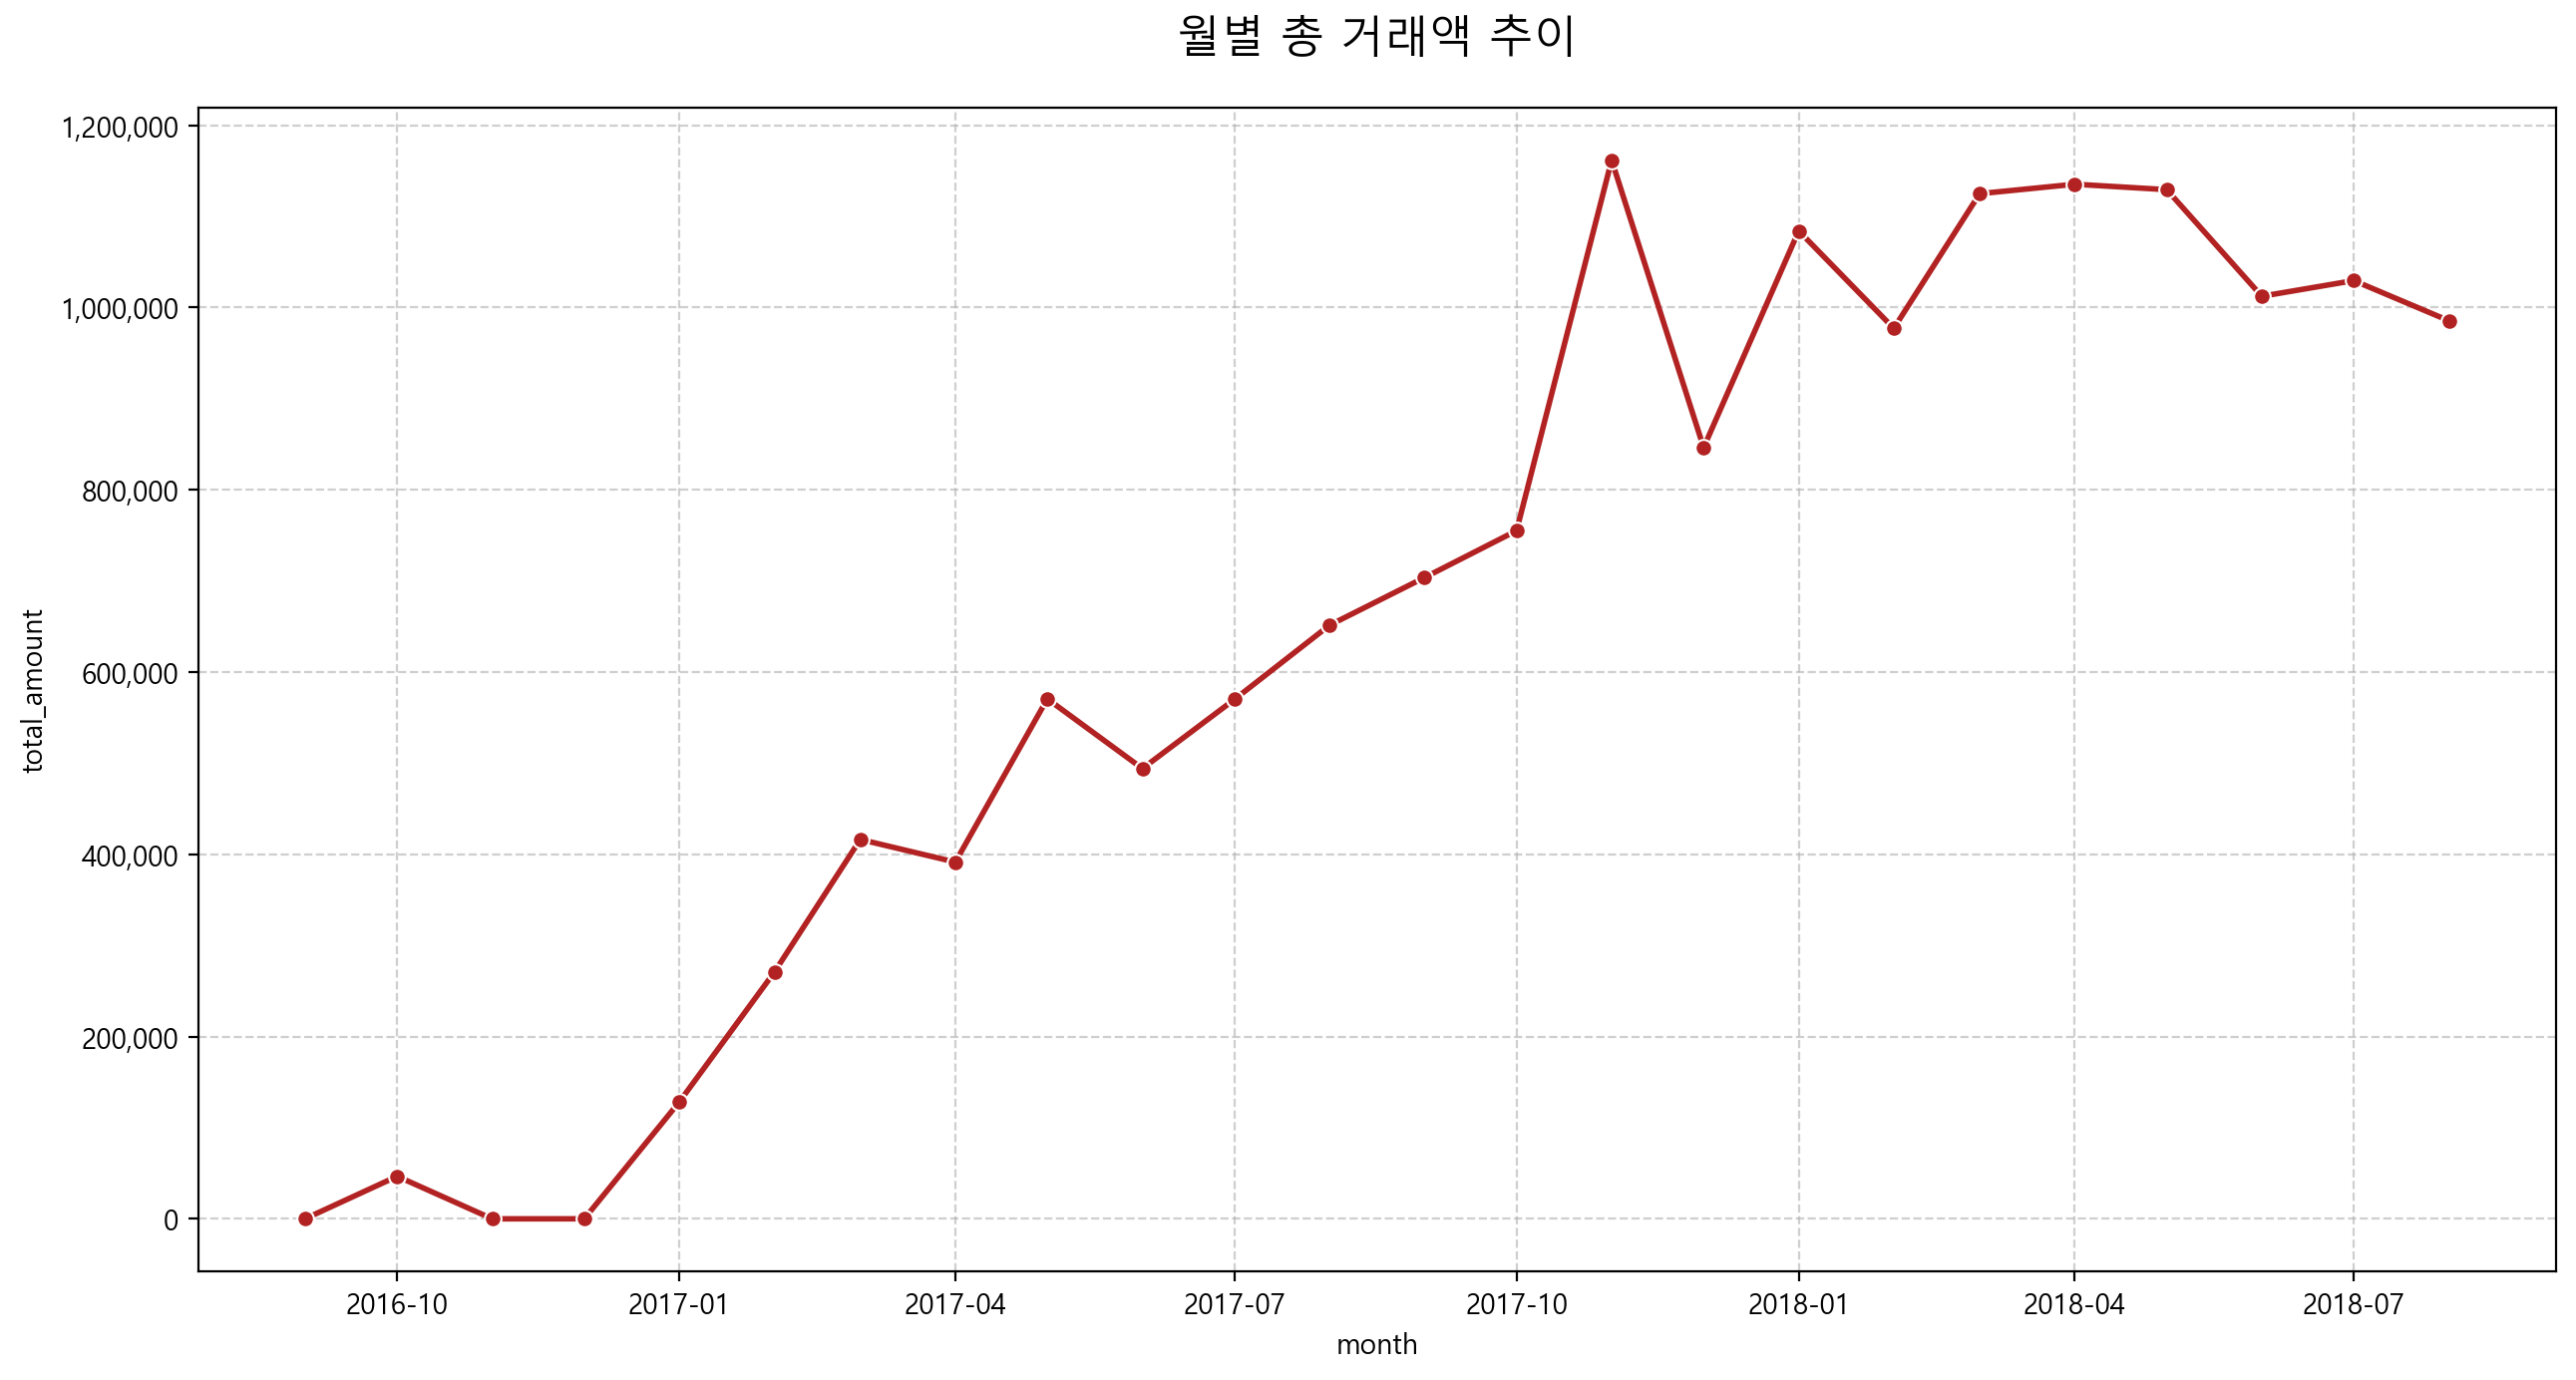

In [409]:
# 시각화
plt.figure(figsize=(13, 7))
ax = sns.lineplot(data=monthly_sales, x='month', y='total_amount', marker='o', color='firebrick', linewidth=2)

# Y축 숫자 가독성 높이기 (지수 표기법 제거)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('월별 총 거래액 추이', fontsize=16, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

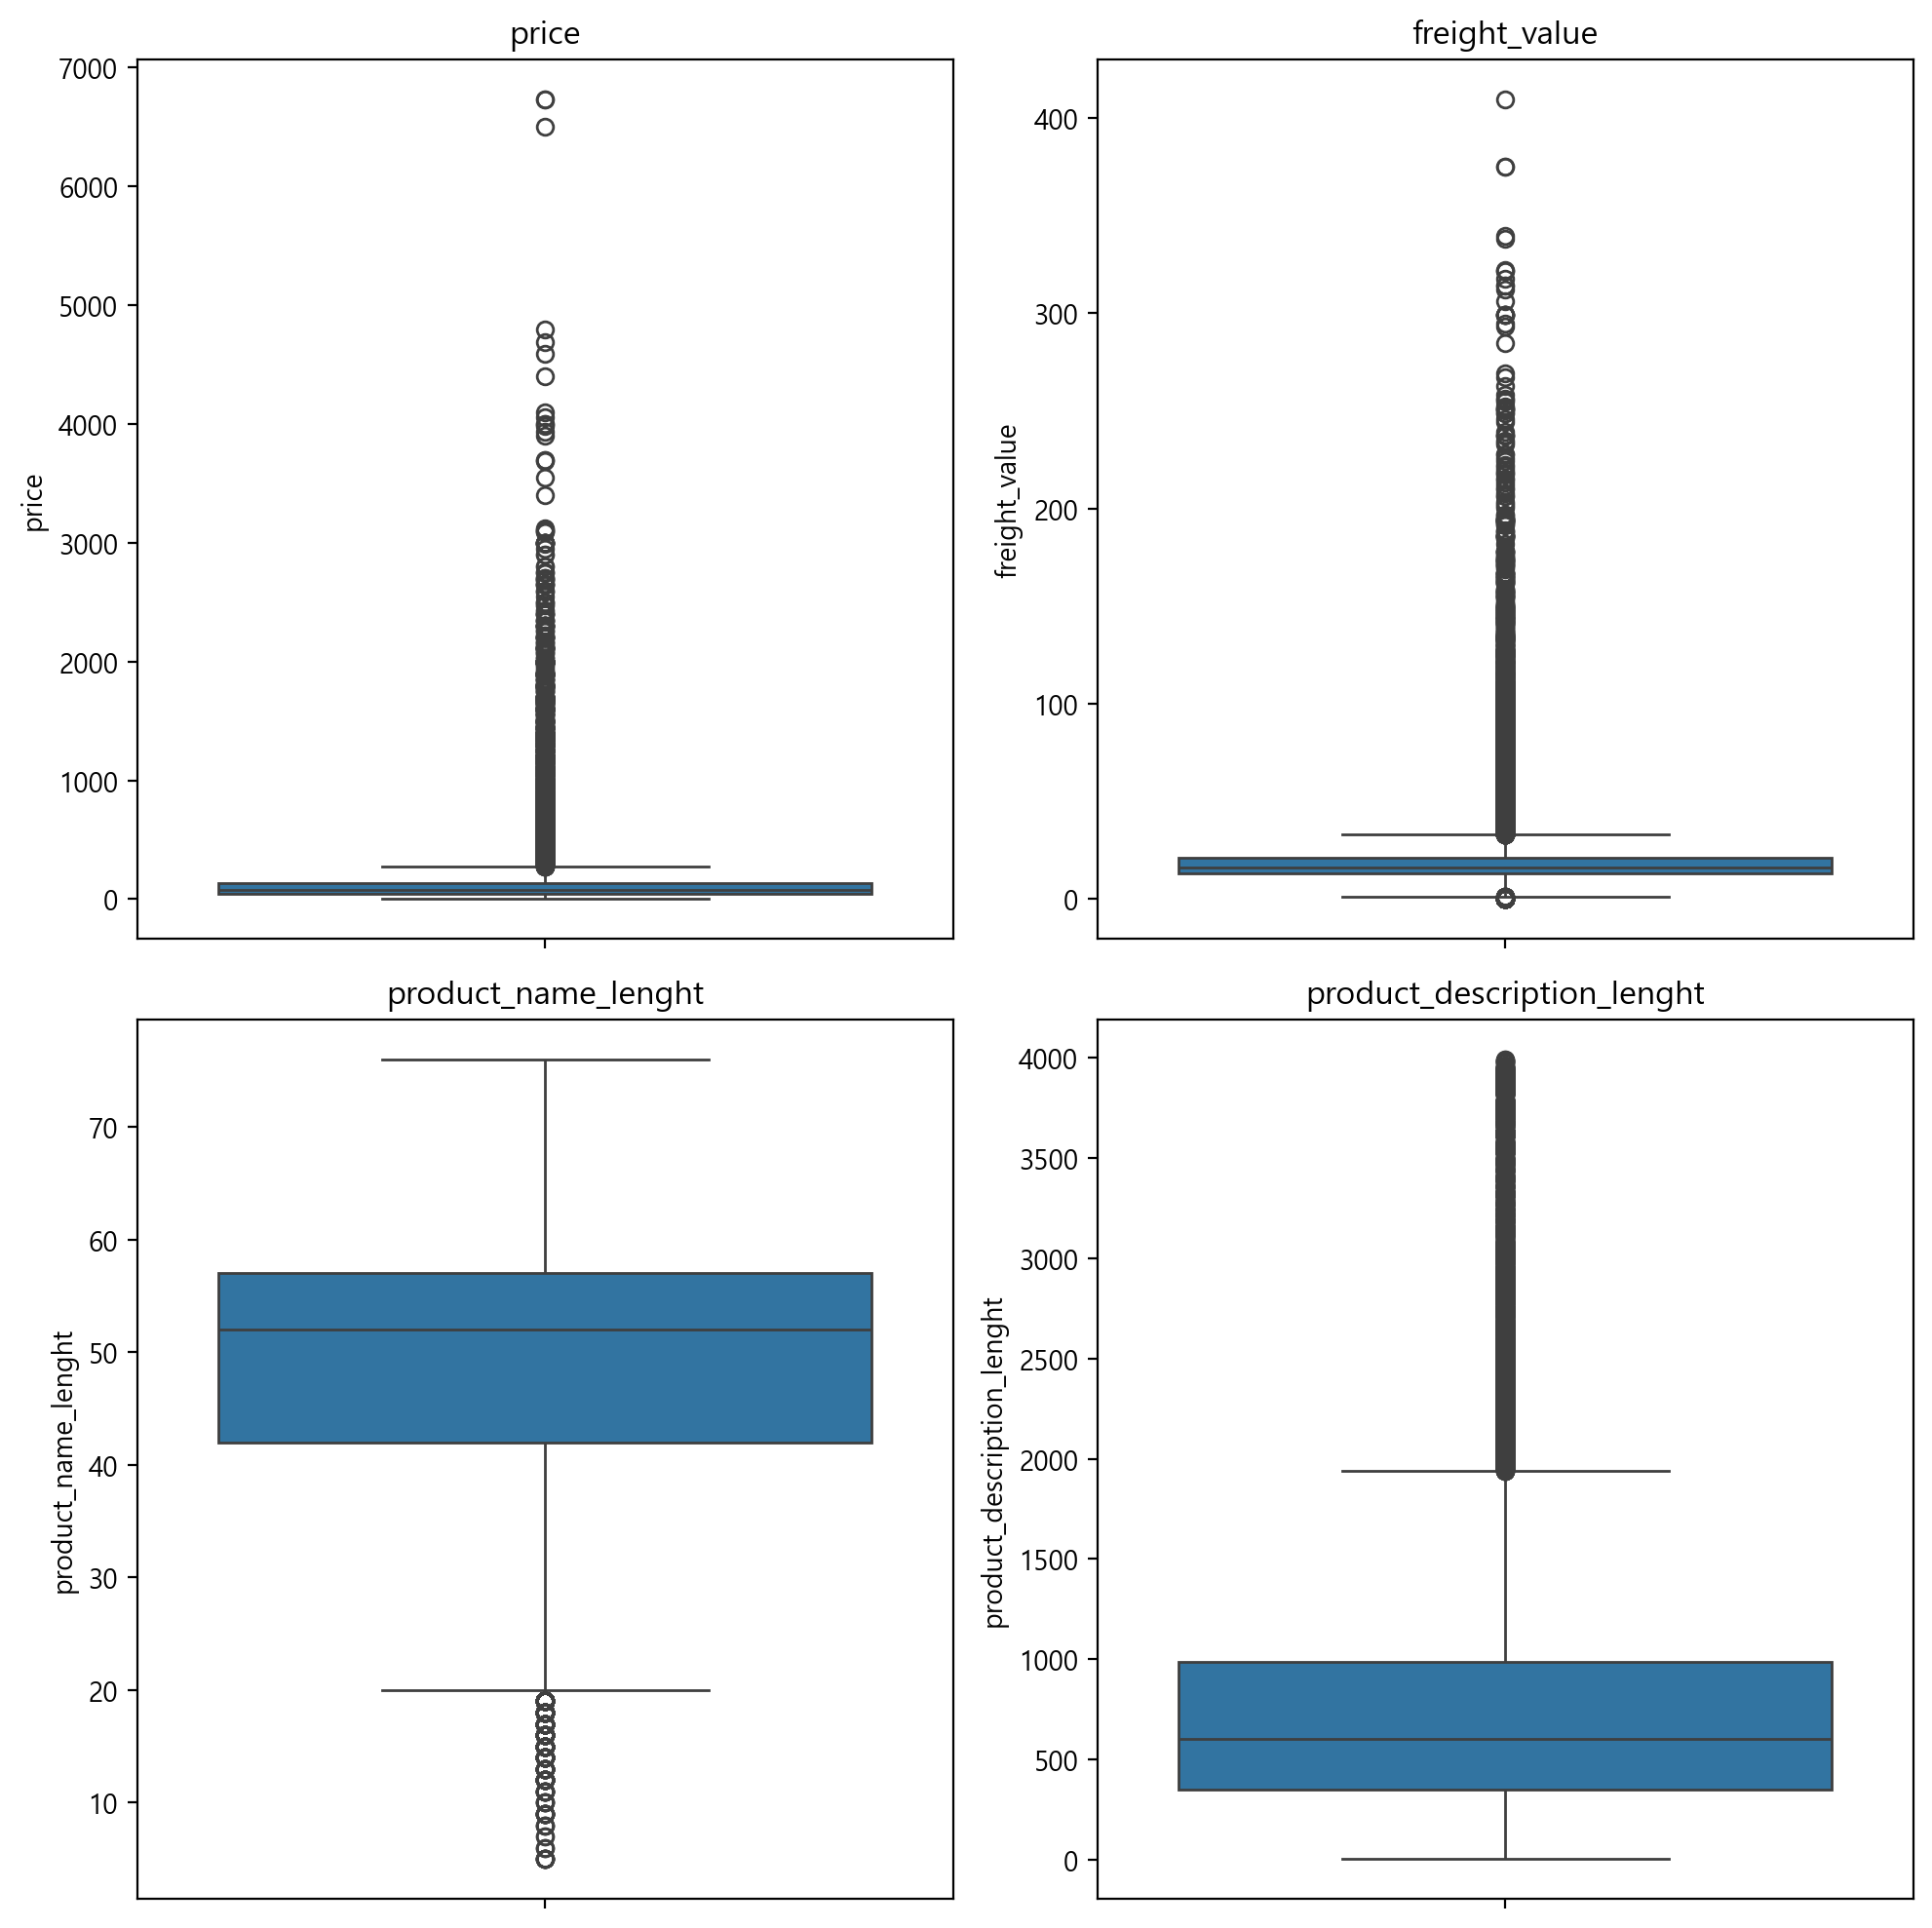

In [410]:
# 17개 주요컬럼 이상치 각자 확인

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 첫 번째 데이터프레임 박스플롯
sns.boxplot(data=sdf['price'], ax=axes[0,0])
axes[0,0].set_title('price')

# 두 번째 데이터프레임 박스플롯
sns.boxplot(data=sdf['freight_value'], ax=axes[0,1])
axes[0,1].set_title('freight_value')

# 세 번째 데이터프레임 박스플롯 -> 적절한 파생컬럼으로 다시하기
sns.boxplot(data=sdf['product_name_lenght'], ax=axes[1,0])
axes[1,0].set_title('product_name_lenght')
axes[1,0].tick_params(axis='x', labelrotation=45)

# 네 번째 데이터프레임 박스플롯
sns.boxplot(data=sdf['product_description_lenght'], ax=axes[1,1])
axes[1,1].set_title('product_description_lenght')

plt.tight_layout() # 그래프 간 간격 자동 조절
plt.show()

In [411]:
# 6000 헤알 이상의 물건은 뭐였을까?
sdf[sdf['price'] >= 6000]

,order_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,total_order_value
3578,0812eb902a67711a1cb742b3cdaa65ae,2017-02-16 20:37:36,6735.0,194.31,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,5.0,"Mesmo a maquina ter vindo errada, ja se pronti...",utilidades_domesticas,31.0,875.0,2.0,6929.31
108482,f5136e38d1a14a4dbd87dff67da82701,2017-06-15 02:45:17,6499.0,227.66,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,5.0,NaN,artes,28.0,3954.0,2.0,6726.66
112894,fefacc66af859508bf1a7934eab1e97f,2018-08-02 04:05:13,6729.0,193.21,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,NaN,NaN,pcs,50.0,1935.0,4.0,6922.21


C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\1698548738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['delivery_duration'] = diff.dt.days


<Axes: >

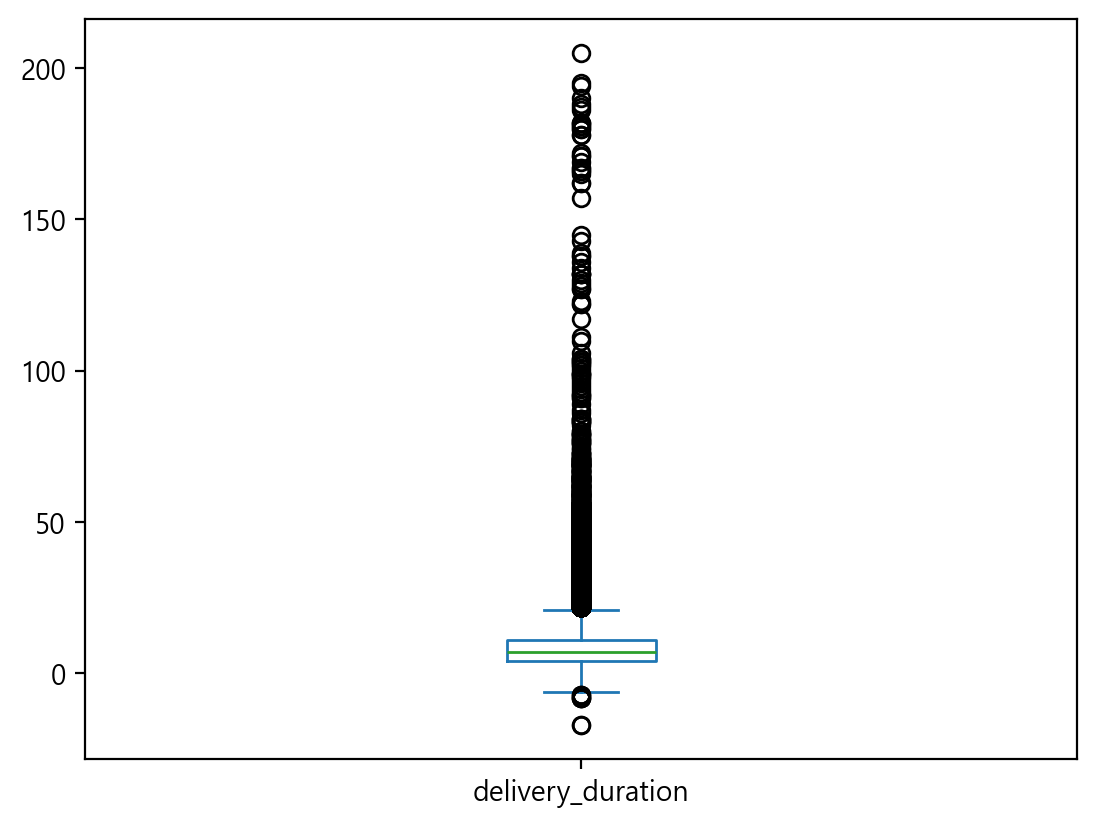

In [412]:
# 순수 배송사의 배송속도는 어느정도일까

# 날짜 차이 계산
diff = sdf['order_delivered_customer_date'] - sdf['order_delivered_carrier_date']

# .dt.days를 사용하여 '일' 단위 숫자만 가져오기
sdf['delivery_duration'] = diff.dt.days

# 시각화
sdf['delivery_duration'].plot(kind='box')

C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\83482652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['seller_duration'] = diff.dt.days


<Axes: >

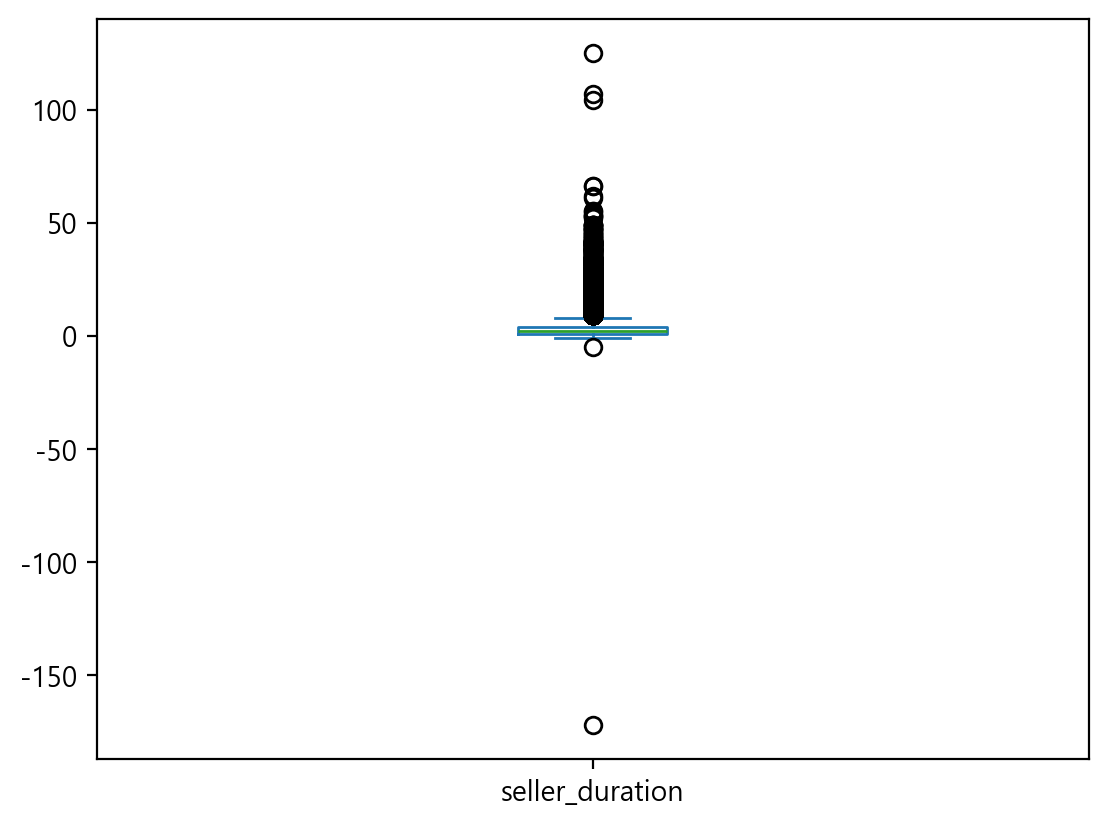

In [418]:
# 순수 판매자의 배송처리시간은 어느정도일까 (결제 승인을 받는 시간또한 포함)

# 날짜 차이 계산
diff = sdf['order_delivered_carrier_date'] - sdf['order_purchase_timestamp']

# .dt.days를 사용하여 '일' 단위 숫자만 가져오기
sdf['seller_duration'] = diff.dt.days

# 시각화
sdf['seller_duration'].plot(kind='box')

In [ ]:
# 찾았다 이상치 요놈! / 2018-07-16 에 결제했는데, 배송사에서 2018-01-26 에 받을수가 없지
sdf[sdf['seller_duration'] < -150]

,order_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,total_order_value,delivery_duration,seller_duration
55041,7c48bb55e8e4f7e56d412e9653db37bc,2018-07-20 18:50:22,40.0,14.58,delivered,2018-07-16 18:40:53,2018-07-16 18:50:22,2018-01-26 13:35:00,2018-07-23 20:04:45,2018-08-07,5.0,NaN,livros_tecnicos,55.0,498.0,1.0,54.58,178.0,-172.0


<Axes: >

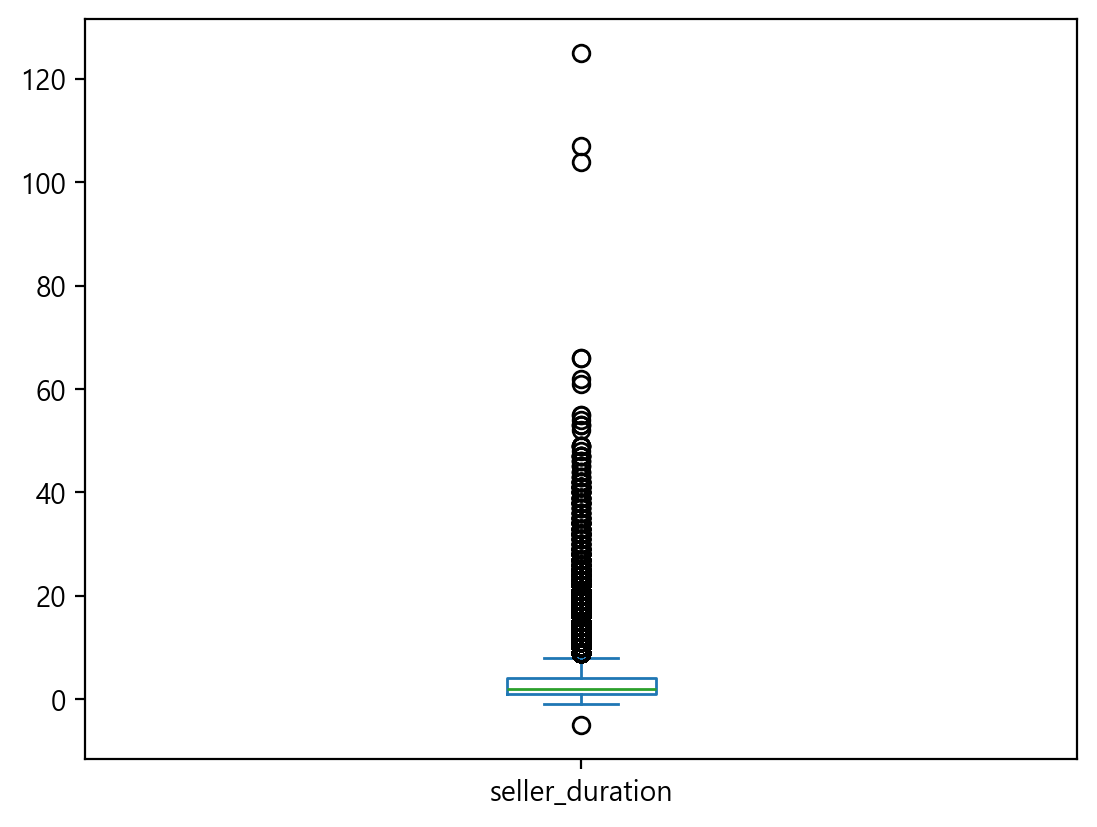

In [ ]:
# 편 - 안 할줄 알았는데 어제 궁금했더 100일이상하는애들은 뭔지 봐보자
sdf[sdf['seller_duration'] > -150]['seller_duration'].plot(kind='box')

In [ ]:
# 가구 장식이였음 / 이들의 리뷰가 몹시 궁금한데,
# Eu nao recebi o quadro da turma do Chaves. (나는 차베스 갱단의 사진을 받지 못했다.) TMI - 차베스 갱단은 별칭임.(우고 차베스가 전 대통령) 브라질 북단에 접경한 베네수엘라의 갱단 '트렌 데 아라구아(Tren de Aragua)' 를 뜻함 
# Problems existem, porem, necessario compreende-los. (문제점은 존재하지만, 그 문제점을 이해하는 것이 중요합니다.)

sdf[sdf['seller_duration'] > 100]

,order_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,total_order_value,delivery_duration,seller_duration
61584,8b7fd198ad184563c231653673e75a7f,2017-11-23 08:47:00,39.99,9.34,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,5.0,Eu nao recebi o quadro da turma do Chaves.,moveis_decoracao,37.0,192.0,2.0,49.33,1.0,104.0
66899,97f48024fcc76f1898e397ad6966e3a0,2017-12-15 12:41:24,1259.00,95.09,delivered,2017-11-29 12:25:00,2017-11-29 12:41:24,2018-03-16 13:58:02,2018-03-16 13:58:10,2017-12-26,1.0,NaN,moveis_decoracao,25.0,175.0,2.0,1354.09,0.0,107.0
96865,da81fbc27b55e0f3d2813cf2078dc780,2017-11-23 21:26:34,1699.00,56.35,delivered,2017-11-14 21:07:55,2017-11-14 21:26:34,2018-03-20 15:44:40,2018-03-21 00:18:54,2017-12-11,1.0,"Problems existem, porem, necessario compreende...",NaN,NaN,NaN,NaN,1755.35,0.0,125.0


<Axes: >

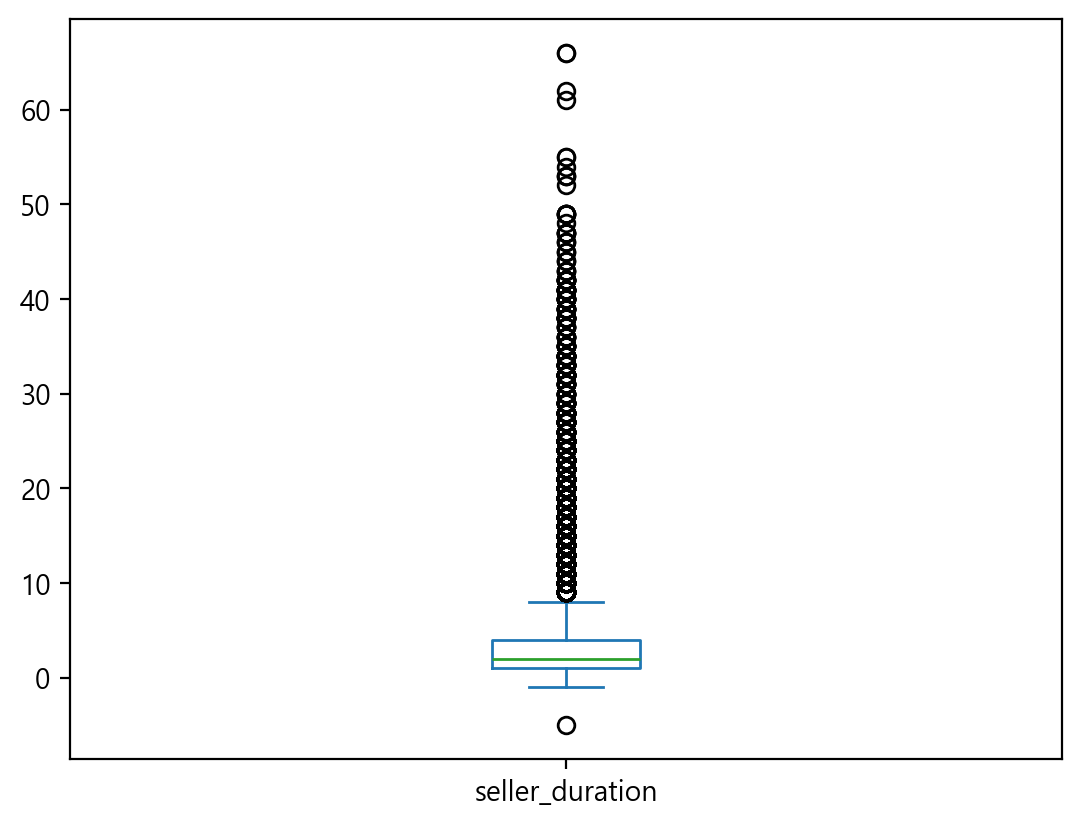

In [ ]:
# 좀 더 편안해진 결과
filtered_sdf = sdf[(sdf['seller_duration'] > -150) & (sdf['seller_duration'] < 100)]
filtered_sdf['seller_duration'].plot(kind='box')

In [ ]:
# 늦은 배송이 정말 낮은 평가와 상관이 있는지?

# 지연 일수 계산 (실제 도착일 - 예정일)
sdf['delay_days'] = (sdf['order_delivered_customer_date'] - sdf['order_estimated_delivery_date']).dt.days

# 상관계수 계산
correlation = sdf[['delay_days', 'review_score']].corr()
print(correlation)

              delay_days  review_score
delay_days      1.000000     -0.007262
review_score   -0.007262      1.000000


,seller_handling_days,carrier_delivery_days,is_seller_late
0,6.0,1.0,1
1,8.0,8.0,1
2,1.0,6.0,0
3,2.0,4.0,0
4,11.0,13.0,1


C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\1691204654.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sdf[sdf['review_score']==5], x='carrier_delivery_days', label='5 Stars', shade=True)
C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\1691204654.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sdf[sdf['review_score']==1], x='carrier_delivery_days', label='1 Star', shade=True)


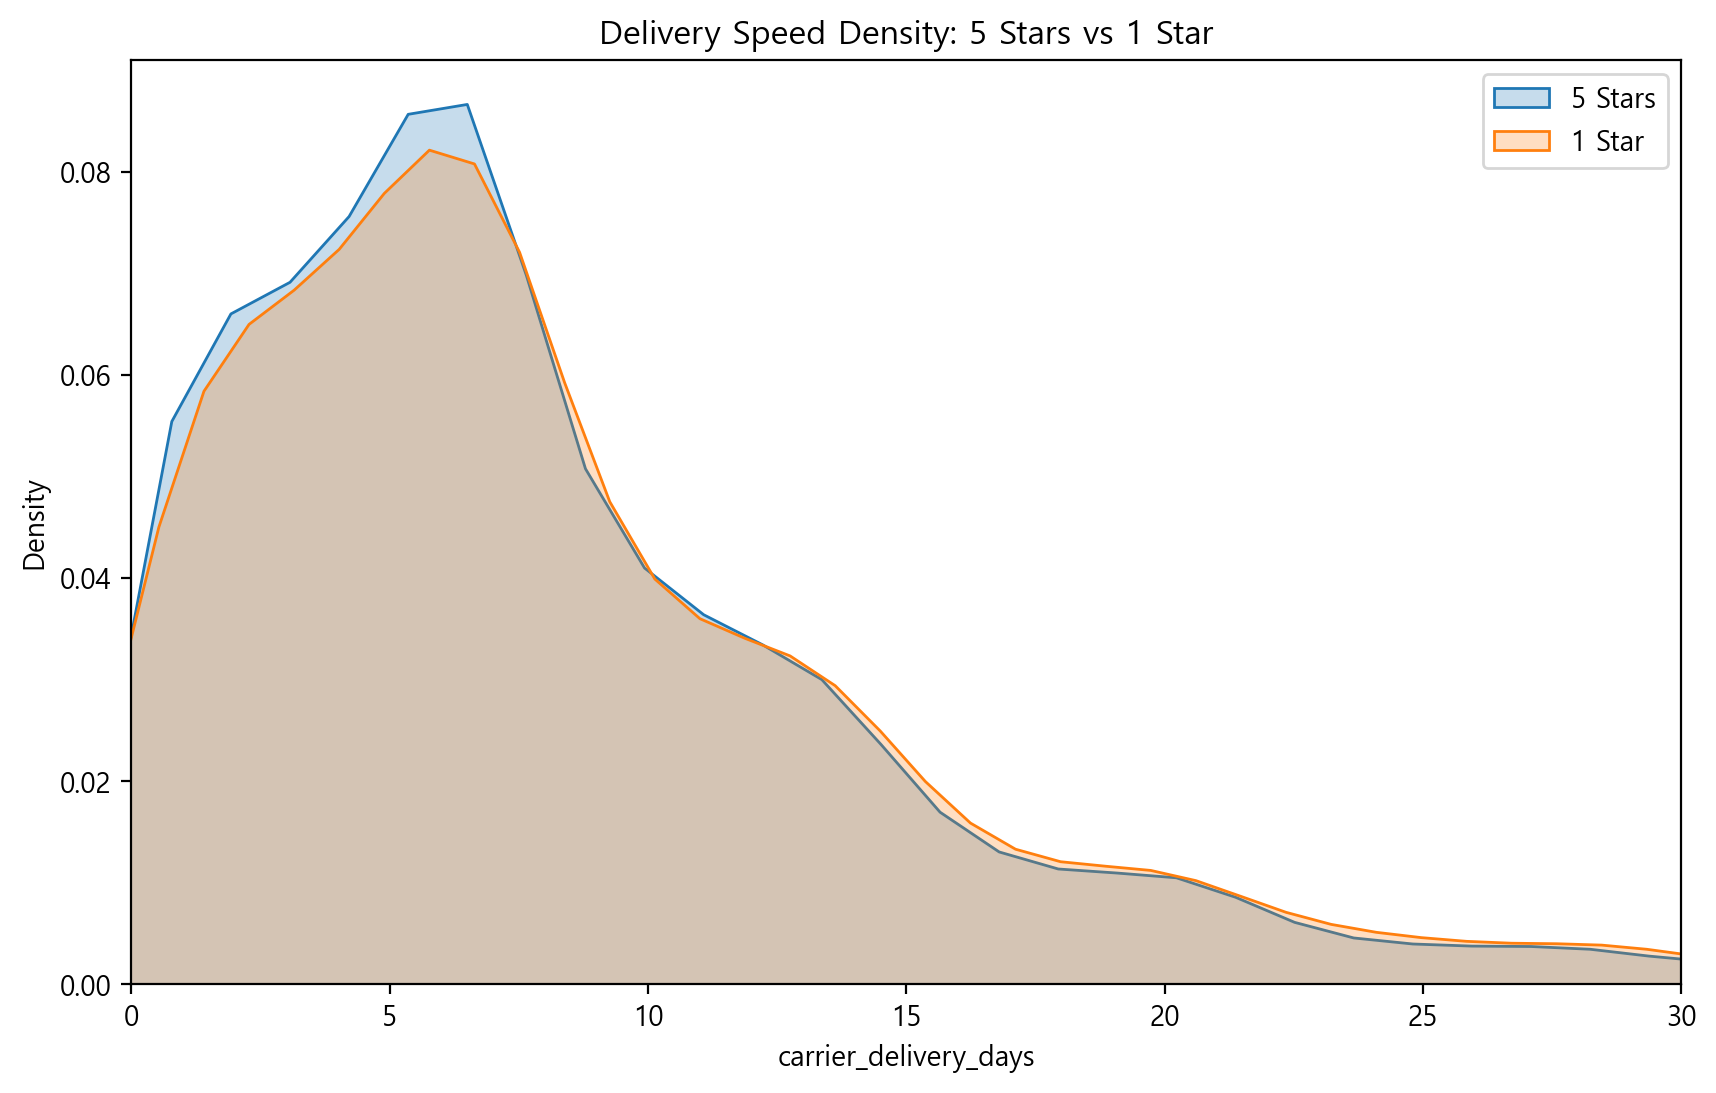

In [ ]:
# 2. 기간 계산 (단위: 일)
# [판매자 구간] 결제 승인 ~ 물류사에 물건 전달
sdf['seller_handling_days'] = (sdf['order_delivered_carrier_date'] - sdf['order_approved_at']).dt.days

# [물류사 구간] 물류사가 물건 받음 ~ 고객에게 도착
sdf['carrier_delivery_days'] = (sdf['order_delivered_customer_date'] - sdf['order_delivered_carrier_date']).dt.days

# 3. 판매자 과실(한계일 초과 여부) 판단
# 시스템상 정해진 발송 한계일(shipping_limit_date)보다 늦게 물류사에 전달했는가?
sdf['is_seller_late'] = (sdf['order_delivered_carrier_date'] > sdf['shipping_limit_date']).astype(int)

# 4. 결과 확인
display(sdf[['seller_handling_days', 'carrier_delivery_days', 'is_seller_late']].head())



# 물류사 트롤링 시각화 (KDE사용)

plt.figure(figsize=(10, 6))
# 1점과 5점 리뷰만 골라서 배송 속도 비교
sns.kdeplot(data=sdf[sdf['review_score']==5], x='carrier_delivery_days', label='5 Stars', shade=True)
sns.kdeplot(data=sdf[sdf['review_score']==1], x='carrier_delivery_days', label='1 Star', shade=True)

plt.xlim(0, 30) # 너무 긴 지연은 제외
plt.title('Delivery Speed Density: 5 Stars vs 1 Star')
plt.legend()
plt.show()

C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\2208020390.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sdf[sdf['review_score']==5], x='seller_handling_days', label='5 Stars', shade=True)
C:\Users\GAZI\AppData\Local\Temp\ipykernel_22648\2208020390.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sdf[sdf['review_score']==1], x='seller_handling_days', label='1 Star', shade=True)


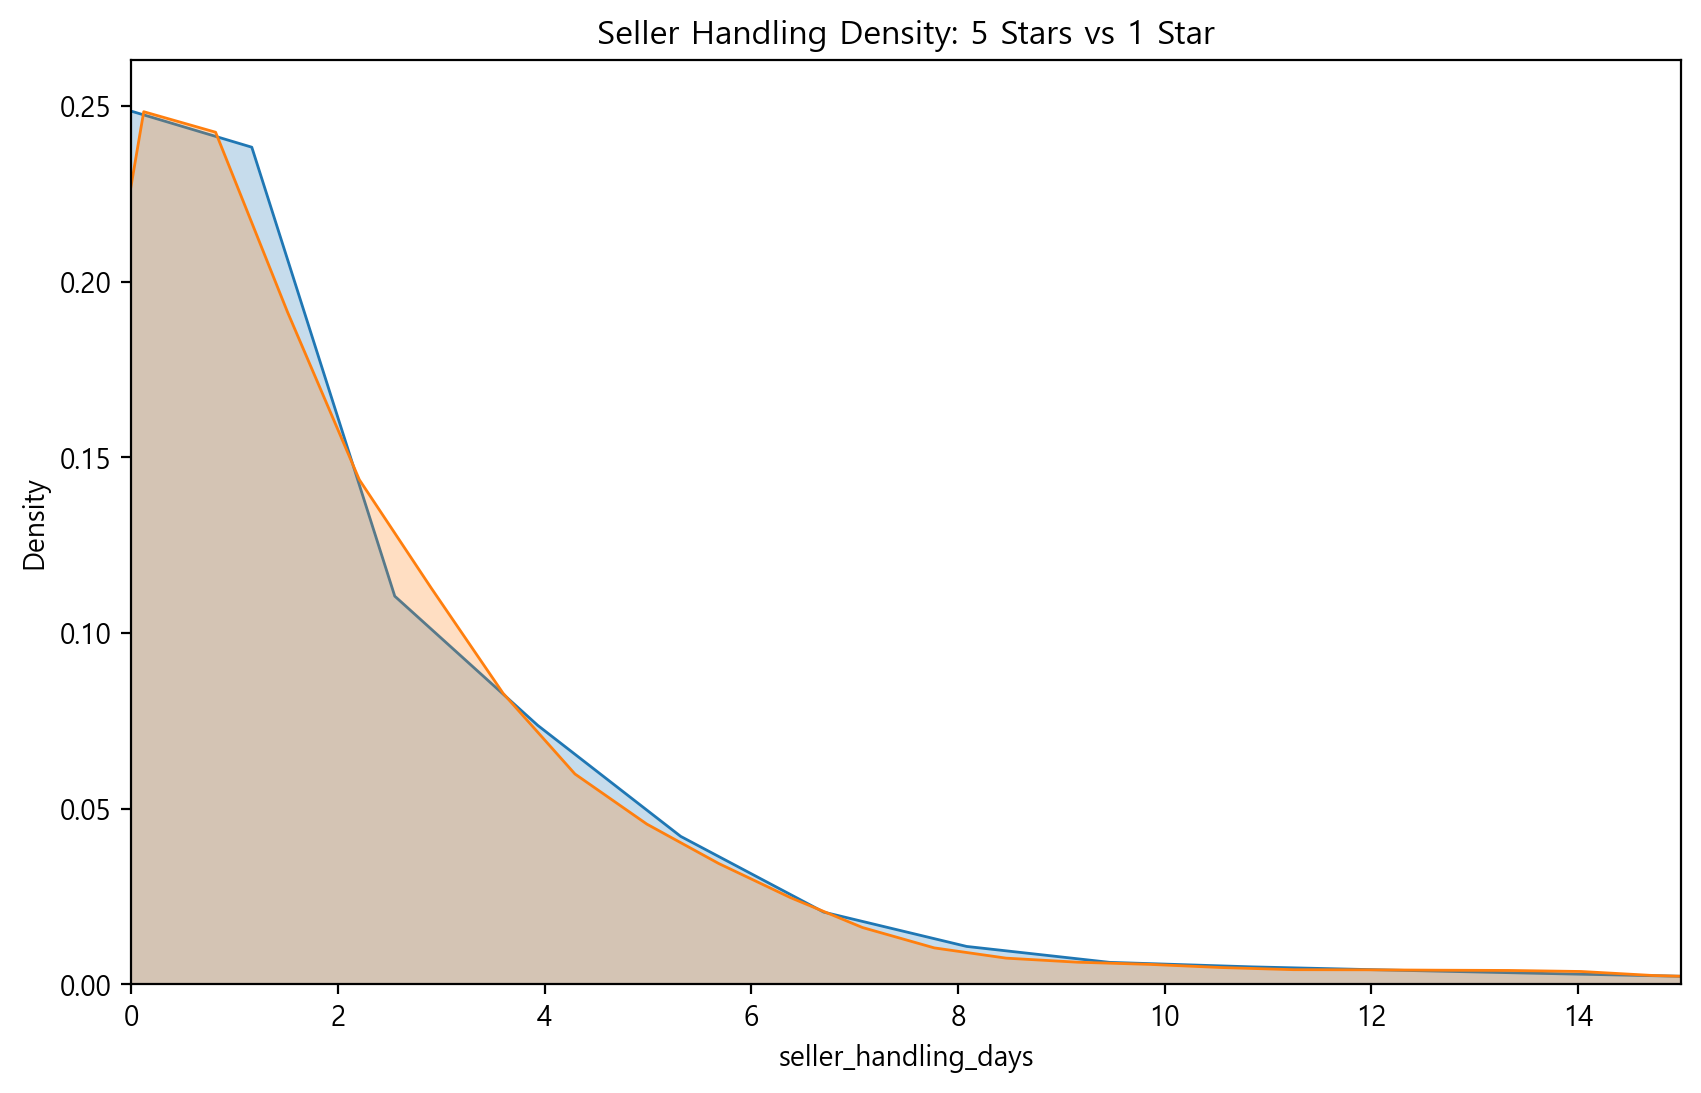

In [ ]:
# 판매자 준비 기간 시각화
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sdf[sdf['review_score']==5], x='seller_handling_days', label='5 Stars', shade=True)
sns.kdeplot(data=sdf[sdf['review_score']==1], x='seller_handling_days', label='1 Star', shade=True)
plt.xlim(0, 15) # 보통 판매자 준비는 짧으므로 범위를 좁혀서 확인
plt.title('Seller Handling Density: 5 Stars vs 1 Star')
plt.show()

In [430]:
# @판매자 귀책 변수 추출
# 나쁜 리뷰의 원인이 '물류사'인지 '판매자'인지 구분 필요
# 판매자 과실을 잡아내는 컬럼 생성 必
# 판매자 과실 : 결제일자 - 주문승일일자 - 배송사 물건 도착 (오래 걸릴수록, 한계일 넘어갈수록 과실 有)
# 물류사 과실 : 배송사 물건 도착 - 실제 물건 도착

In [415]:
# @판매자 발송 지연율
# 물류사에 물건을 늦게 넘긴 것은 100% 판매자 잘못
# order_items 테이블의 shipping_limit_date와
# orders 테이블의 order_delivered_carrier_date를 비교
# > order_delivered_carrier_date > shipping_limit_date인 비율.

In [416]:
# @평균 발송 소요 시간
# order_approved_at(주문 승인)부터 order_delivered_carrier_date(집하 완료)까지 걸린 시간의 평균.

In [417]:
# @상품 정보 충실도
# description_length, photos_qty
# 사진이 적거나(1장 이하), 설명이 너무 짧은 상품을 파는 판매자에게는 점수 패널티 부여?